In [42]:
## Import Libraies
import pandas as pd
%pylab inline
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy.stats import pearsonr
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import pickle
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


# Data Cleaning and Preparation

In [43]:
## Load housing data ##
yaba = pd.read_csv('Data/House_prices_yaba.csv')
surulere = pd.read_csv('Data/House_prices_surulere.csv')
ikeja = pd.read_csv('Data/House_prices_ikeja.csv')
gbagada = pd.read_csv('Data/House_prices_gbagada.csv')
ajah = pd.read_csv('Data/House_prices_ajah.csv')
lekki = pd.read_csv('Data/House_prices_lekki_phase_1.csv')
ikorodu = pd.read_csv('Data/House_prices_ikorodu.csv')

In [44]:
## Append housing data into data set ##
data1 = yaba.append(surulere)
data2 = data1.append(gbagada)
data3 = data2.append(lekki)
data4 = data3.append(ikorodu)
data5 = data4.append(ikeja)
lagos_house_data = data5.append(ajah)

In [45]:
## Data Shape ##
lagos_house_data.shape

(46789, 15)

## Checking and Removing Duplicate Records from the Dataset

In [46]:
lagos_house_data[lagos_house_data.duplicated(subset=['property_code'])].sort_values(by='property_code')

,Unnamed: 0,location,specific_location,features,bed,bath,toilet,description,price,category,property_code,date_posted/updated,service_level,key_features,detail_description
5665,11772,ikeja,ikejaIkeja Ikeja Lagos,4 beds 4 baths 5 Toilets,4,4,5,A Spacious 3 Wings of 4 Bedroom Duplex,4000000,NaN,0133,"Updated 12 Jul 2018, Added 14 Jul 2016",NaN,4 Bedroom,"Very lovely spacious, 3 Wings of 4 bedrooms du..."
6470,6470,lekki phase 1,Lekki phase 1Lagos,2 beds 2 baths Toilets,2,2,0,Serviced Two Bedroom Flat,3000000,NaN,0511,"Updated 19 Jul 2018, Added 25 Jul 2016",NaN,2 Bedroom,Features..\n\nEnsuite 2 bedroom\n\nDinning\n\n...
8554,8554,lekki phase 1,LEKKI PHASE 1Lagos,beds baths Toilets,0,0,0,5 Bedroom Duplex in Lekki Phase 1,8000000,NaN,0880,Added 15 Jul 2016,NaN,NaN,Luxury 1 year old 5 bedroom duplex for let in ...
7139,14652,ikeja,Isaac John streetIkeja Ikeja Lagos,3 beds 3 baths 4 Toilets,3,3,4,30 Units Of 3 Bedroom Flat,5000000,NaN,0945,"Updated 25 Jul 2016, Added 25 Jul 2016",NaN,3 Bedroom,A newly built 30 units of serviced 3 bedroom ...
4349,4349,lekki phase 1,Lekki Phase 1 Lekki Lagos,4 beds 4 baths 5 Toilets,4,4,5,LUXURY 4 BEDROOM TERRACE DUPLEX,6000000,NaN,0BWPV,"Updated 21 Dec 2019, Added 09 Nov 2018",NaN,4 Bedroom,A tastefully built 4 bedroom terrace duplex wi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,4895,lekki phase 1,Off admiralty wayLekki Phase 1 Lekki Lagos,5 beds 5 baths 6 Toilets,5,5,6,Luxury 5 bedroom detached house + a room bq,6000000,NaN,Z4017,"Updated 24 Nov 2019, Added 03 Oct 2018",NaN,5 Bedroom,An exquisite 5 bedroom fully detached house al...
3616,3616,lekki phase 1,Off admiralty wayLekki Phase 1 Lekki Lagos,3 beds 3 baths 4 Toilets,3,3,4,Serviced 3 bedroom apartment all rooms ensuite...,3500000,NaN,Z4022,"Updated 15 Feb 2020, Added 03 Oct 2018",NaN,3 Bedroom,Tasteful 3 bedroom ensuite apartment with a we...
3612,3612,lekki phase 1,Off Admiralty Way Lekki Phase 1 Lekki Lagos,4 beds 4 baths 5 Toilets,4,4,5,Luxury 4 bedroom duplex + a room bq,5500000,NaN,Z5826,"Updated 15 Feb 2020, Added 10 Oct 2018",NaN,4 Bedroom,Luxury 4 bedroom duplex house all rooms ensuit...
4858,4858,lekki phase 1,Off providence RoadLekki Phase 1 Lekki Lagos,1 beds 1 baths 1 Toilets,1,1,1,Luxury 1 bedroom apartment,1700000,NaN,Z6049,"Updated 24 Nov 2019, Added 11 Oct 2018",NaN,1 Bedroom,Brand new 1 bedroom miniflat\nSecured environm...


In [47]:
## Drop Duplicates From DataSet
lagos_house_data = lagos_house_data.drop_duplicates() 

In [48]:
## No property in the dataset that have all its columns duplicated by any other
lagos_house_data.shape 

(46789, 15)

## Checking, Removing and Replacing Null Values in the Dataset

In [49]:
## Check Sum Of Null Values ##
lagos_house_data.isnull().sum() 

Unnamed: 0                 0
location                   0
specific_location          0
features                   0
bed                        0
bath                       0
toilet                     0
description                0
price                    907
category               44400
property_code              0
date_posted/updated        0
service_level          34299
key_features            7516
detail_description      3236
dtype: int64

###### <ul>
<li>Null values in the 'price' colum has to be removed to not affect predictive model</li>
<li>Null values in 'detail_description' & 'key_features' have to be replaced  </li>
</ul> 

In [50]:
## Remove all Null Values in Price Colum ##
lagos_house_data.dropna(subset =['price'], inplace=True)

In [51]:
## Replace Null Value ##
lagos_house_data['detail_description'].replace(np.nan,'samples must be there', inplace=True)

In [52]:
## Replace Null Value ##
lagos_house_data['key_features'].replace(np.nan,'samples must be there', inplace=True)

### Removing Special Charaters from the 'price' Column

In [53]:
## Define Spliitter fuction to Remove 
def splitter(x ,retrieve_dollar):
    price,currency_type = None, None
   
    if '$' in str(x):
        currency_type ='$'
        price = float(str(x).split(' ')[1])++
    else:
        price = float(x)
        currency_type = 'N'
        
    if retrieve_dollar:
        return currency_type
    else:
        return price

price_values = lagos_house_data.price.apply(lambda x :splitter(x,False))

currency_type = lagos_house_data.price.apply(lambda x :splitter(x,True))


In [54]:
price_values

0        700000.0
1       1000000.0
2       1800000.0
3       1500000.0
4       1800000.0
          ...    
8311    2500000.0
8312     850000.0
8313     700000.0
8314    2000000.0
8315      25000.0
Name: price, Length: 45882, dtype: float64

In [55]:
lagos_house_data['price'] = price_values

In [56]:
lagos_house_data.isna().sum()

Unnamed: 0                 0
location                   0
specific_location          0
features                   0
bed                        0
bath                       0
toilet                     0
description                0
price                      0
category               44400
property_code              0
date_posted/updated        0
service_level          34102
key_features               0
detail_description         0
dtype: int64

### Getting New Features From Proprety Details

### Actions

###### <ul>
Create new features that would have an effect on the price of properties in Lagos like:  
<li>Type of properties(Houses) and Number of bedrooms  will effect on the price  </li>
<li></li>
</ul> 

In [57]:
## Converting strings to lower case ##
lagos_house_data['detail_description'] = [x.lower() for x in lagos_house_data['detail_description']]
lagos_house_data['specific_location'] = [x.lower() for x in lagos_house_data['specific_location']]
lagos_house_data['description'] = [x.lower() if type(x) != float else x for x in lagos_house_data['description']]
lagos_house_data['service_level'] = [x.lower() if type(x) != float else x for x in lagos_house_data['service_level']]


In [58]:
## Locator Fuction ##
def locator(column, iterator):
    for i in iterator:
        if i in column:
            return i.strip().capitalize()


In [59]:
 ##  List of property type we wish to locate ##
    property_type = ['semi detached bungalow', 'semi detached duplex', 'detached bungalow', 'self contain',
                     'mini flat', 'detached duplex', 'terraced bungalow', 'terraced duplex', 'penthouse flat',
                     'massionette house', 'blocks of flats', 'flat / apartment']
   

In [60]:
# Finding Property Type and dropping none values in the column
    lagos_house_data['Property_Type'] = lagos_house_data['detail_description'].apply(lambda x: locator(x, property_type))
    lagos_house_data.dropna(subset=['Property_Type'], inplace=True)

In [61]:
lagos_house_data.head(3)

,Unnamed: 0,location,specific_location,features,bed,bath,toilet,description,price,category,property_code,date_posted/updated,service_level,key_features,detail_description,Property_Type
0,0,yaba,abule ijesha yaba lagos,1 beds 1 baths 2 Toilets,1,1,2,newly built pop finished mini flat with 2 toil...,700000.0,Premium Gold,1ENKM,"Updated 21 Apr 2021, Added 12 Apr 2021",newly built,1 Bedrooms\nNew,newly built pop finished mini flat with 2 toil...,Mini flat
15,43,yaba,onike yaba lagos,1 beds 1 baths 2 Toilets,1,1,2,"newly built mini flat, pop finished , fitted w...",700000.0,Premium,5EPFS,Added 21 Apr 2021,newly built,1 Bedrooms\nNew,"newly built mini flat, pop finished , fitted w...",Mini flat
17,45,yaba,off herbert macaulay wayebute metta yaba lagos,1 beds 1 baths 1 Toilets,1,1,1,a very clean & spacious mini flat @ ebute mett...,500000.0,Premium,1EPFK,Added 21 Apr 2021,NaN,1 Bedroom,a very clean & spacious mini flat @ ebute mett...,Mini flat


In [62]:

 ## Dropping lands, office and commercial properties ##
lagos_house_data.drop(lagos_house_data[(lagos_house_data['detail_description'].str.contains('land')) | (lagos_house_data['detail_description'].str.contains('office')) | (lagos_house_data['detail_description'].str.contains('commercial'))].index, inplace=True)


In [63]:
## Finding Key Features from 'description' and 'detail_description' ##
    lagos_house_data['Parking_Space'] = np.where(
        ((lagos_house_data.detail_description.str.contains('parking space')) | (lagos_house_data.description.str.contains('parking space'))), 1, 0)
    lagos_house_data['Security'] = np.where(
        ((lagos_house_data.detail_description.str.contains('security')) | (lagos_house_data.description.str.contains('security'))), 1, 0)
    lagos_house_data['Electricity'] = np.where(
        ((lagos_house_data.detail_description.str.contains('electricity')) | (lagos_house_data.description.str.contains('electricity'))), 1, 0)
    lagos_house_data['Furnished'] = np.where(
        ((lagos_house_data.detail_description.str.contains('furnished')) | (lagos_house_data.description.str.contains('furnished'))), 1, 0)
    lagos_house_data['Security_Doors'] = np.where(
        ((lagos_house_data.detail_description.str.contains('security doors')) | (lagos_house_data.description.str.contains('security doors'))), 1, 0)
    lagos_house_data['CCTV'] = np.where(((lagos_house_data.detail_description.str.contains('cctv')) | (lagos_house_data.description.str.contains('cctv'))), 1, 0)
    lagos_house_data['Pool'] = np.where(
        ((lagos_house_data.detail_description.str.contains('pool')) | (lagos_house_data.description.str.contains('pool'))), 1, 0)
    lagos_house_data['Gym'] = np.where(
        ((lagos_house_data.detail_description.str.contains('gym')) | (lagos_house_data.description.str.contains('gym'))), 1, 0)
    lagos_house_data['BQ'] = np.where(
        ((lagos_house_data.detail_description.str.contains('bq')) | (lagos_house_data.detail_description.str.contains('serviced quarters'))), 1, 0)

In [64]:
pd.set_option('display.max_columns',None)

In [65]:
lagos_house_data.head(3)

,Unnamed: 0,location,specific_location,features,bed,bath,toilet,description,price,category,property_code,date_posted/updated,service_level,key_features,detail_description,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,0,yaba,abule ijesha yaba lagos,1 beds 1 baths 2 Toilets,1,1,2,newly built pop finished mini flat with 2 toil...,700000.0,Premium Gold,1ENKM,"Updated 21 Apr 2021, Added 12 Apr 2021",newly built,1 Bedrooms\nNew,newly built pop finished mini flat with 2 toil...,Mini flat,0,0,0,0,0,0,0,0,0
15,43,yaba,onike yaba lagos,1 beds 1 baths 2 Toilets,1,1,2,"newly built mini flat, pop finished , fitted w...",700000.0,Premium,5EPFS,Added 21 Apr 2021,newly built,1 Bedrooms\nNew,"newly built mini flat, pop finished , fitted w...",Mini flat,0,0,0,0,0,0,0,0,0
19,48,yaba,makokosabo yaba lagos,1 beds 1 baths 2 Toilets,1,1,2,"newly built mini flat, all rooms en-suite, pop...",650000.0,Premium,5EPEM,Added 21 Apr 2021,newly built,1 Bedrooms\nNew,"newly built mini flat, all rooms en-suite, pop...",Mini flat,0,0,0,0,0,0,0,0,0


## Outliers Check and Treatment

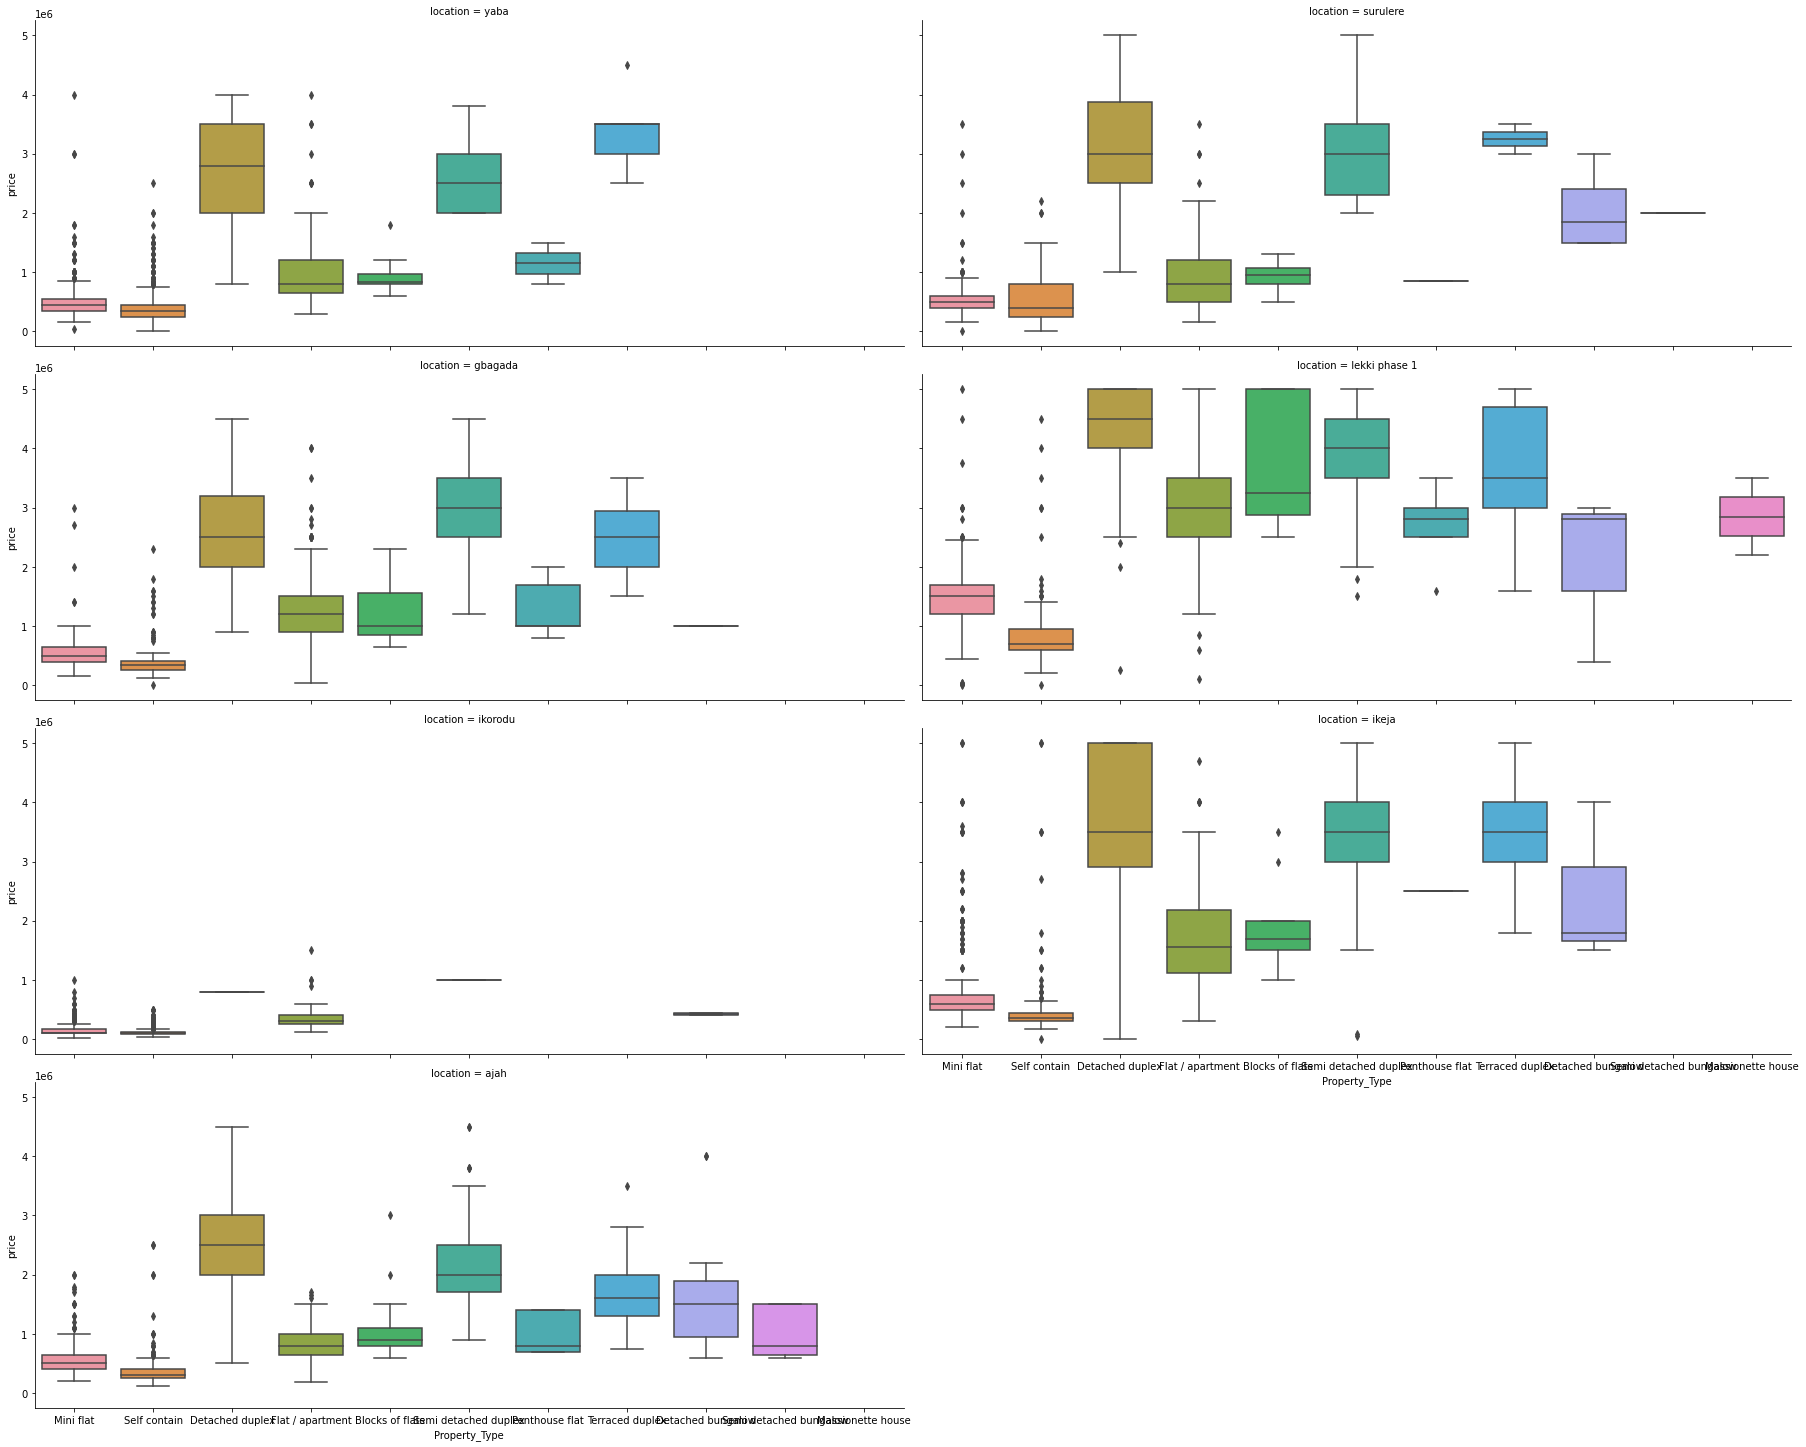

In [66]:
## Checking the relationship betten price and property type in diffrent loations ##  
sns.catplot(
    data=lagos_house_data[(lagos_house_data['price'] <= 5000000)] ,x='Property_Type', y='price',
    col='location', kind='box', col_wrap=2, aspect=2.5,  legend= 'True'
)

### Observations

###### <ul>
<li>Detached duplex, Semi detached deplex and Terraced duplex have the highest price in all loactions </li>
<li>Houses in Lekki pahse 1 has the highs prices of rent while houses in Ikorodu has the lowest rent prices  </li>
</ul> 

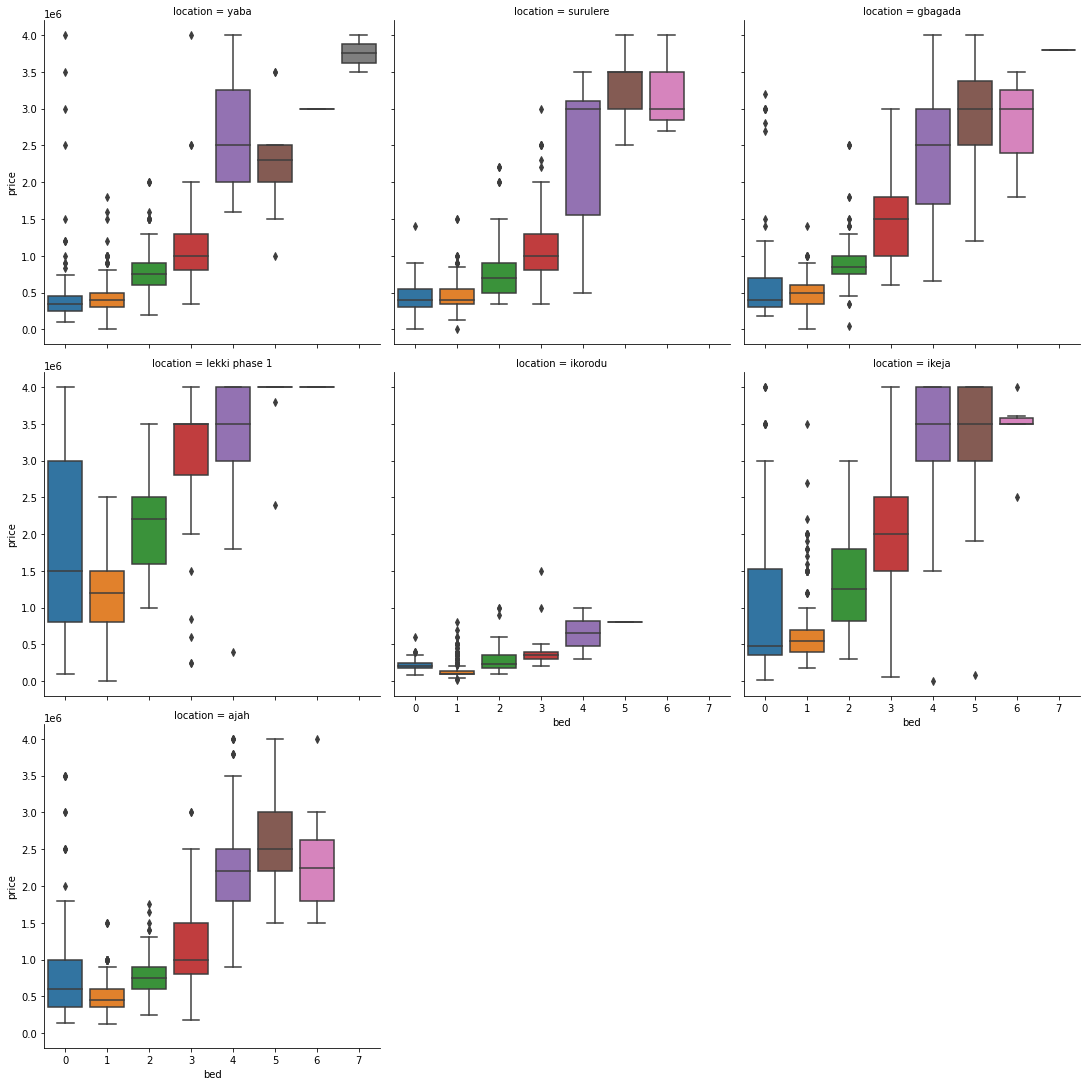

In [67]:
## Checking the relationship betten price and property type in diffrent loations ##  
sns.catplot(
    data=lagos_house_data[(lagos_house_data['price'] <= 4000000)] ,x='bed', y='price',
    col='location', kind='box', col_wrap=3,
)

### Actions

###### <ul>
<li>Detect and Remove outliers form data </li>
<li>Reduse the maximum number of rooms from 7 to 5  </li>
</ul> 

In [70]:
## Removing properties with zero value, no bedrooms, no bath, no toilet, and those with more that 5 beds
lagos_house_data =lagos_house_data[((lagos_house_data['bed'] > 0) & (lagos_house_data['bed'] <= 5))]
lagos_house_data =lagos_house_data[((lagos_house_data['bath'] > 0) & (lagos_house_data['bath'] <= 5))]
lagos_house_data =lagos_house_data[((lagos_house_data['toilet'] > 0) & (lagos_house_data['toilet'] <= 5))]
lagos_house_data =lagos_house_data[lagos_house_data['price'] > 0]
lagos_house_data =lagos_house_data[(lagos_house_data['bath'] > 0) & (lagos_house_data['toilet'] > 0)]

In [71]:
## Cheaking Data Shape
lagos_house_data.shape

(6874, 25)

In [72]:
# Function to Detect Outlier 
def outlier(df, column):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[column] if x < lower or x > upper]
    index = df.loc[df[column].isin(outliers)].index

    return index


In [73]:
 # Dropping price outiers
odd_price = outlier(lagos_house_data, 'price')
lagos_house_data.drop(odd_price, inplace=True)


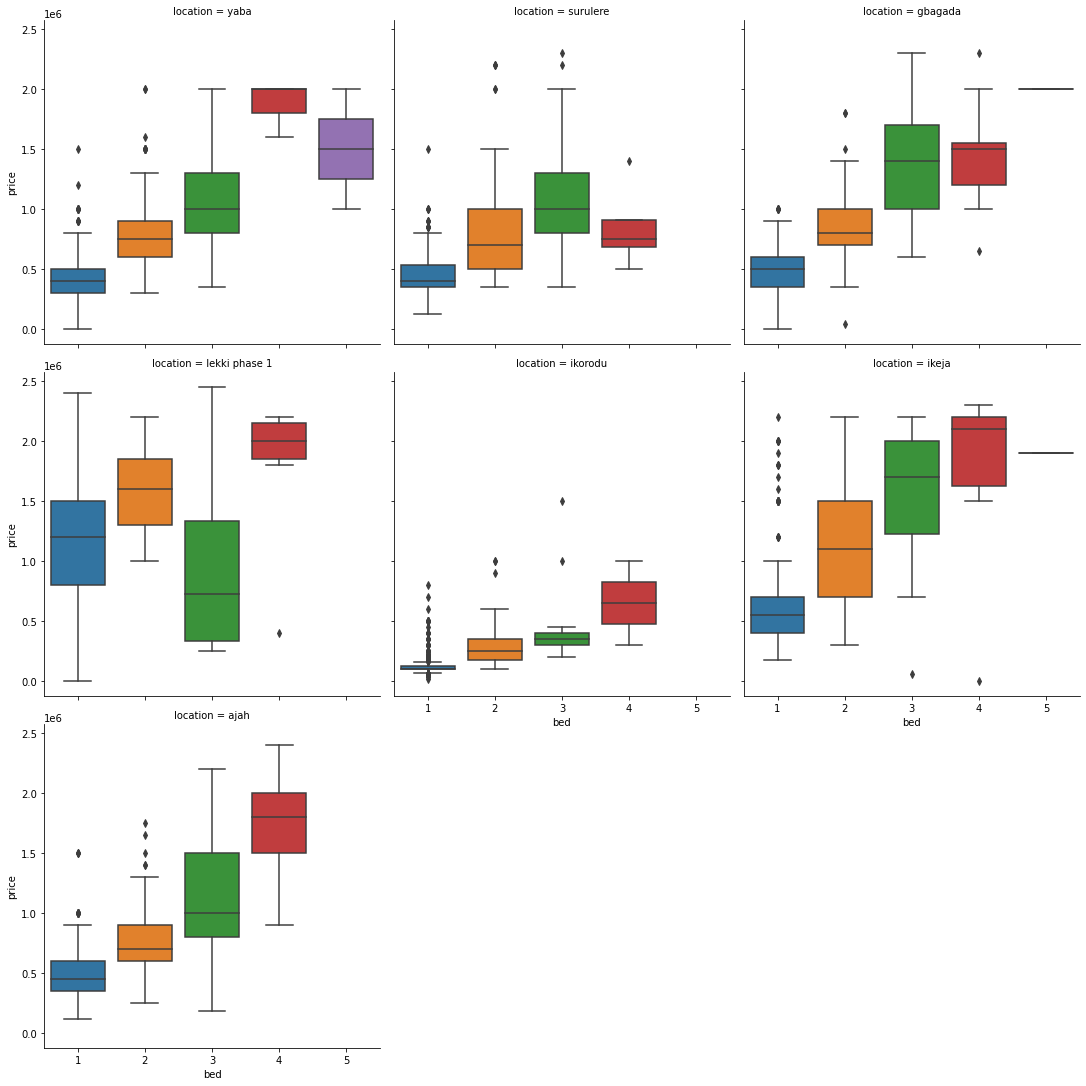

In [74]:
## Checking the relationship betten price and property type in diffrent loations ##  
sns.catplot(
    data=lagos_house_data[(lagos_house_data['price'] <= 8000000)] ,x='bed', y='price',
    col='location', kind='box', col_wrap=3,
)

In [75]:
lagos_house_data.head(2)

,Unnamed: 0,location,specific_location,features,bed,bath,toilet,description,price,category,property_code,date_posted/updated,service_level,key_features,detail_description,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,0,yaba,abule ijesha yaba lagos,1 beds 1 baths 2 Toilets,1,1,2,newly built pop finished mini flat with 2 toil...,700000.0,Premium Gold,1ENKM,"Updated 21 Apr 2021, Added 12 Apr 2021",newly built,1 Bedrooms\nNew,newly built pop finished mini flat with 2 toil...,Mini flat,0,0,0,0,0,0,0,0,0
15,43,yaba,onike yaba lagos,1 beds 1 baths 2 Toilets,1,1,2,"newly built mini flat, pop finished , fitted w...",700000.0,Premium,5EPFS,Added 21 Apr 2021,newly built,1 Bedrooms\nNew,"newly built mini flat, pop finished , fitted w...",Mini flat,0,0,0,0,0,0,0,0,0


In [76]:
cleaned_data= lagos_house_data.drop(['service_level','specific_location','features','description','category','property_code','date_posted/updated','key_features','detail_description','Unnamed: 0'],axis=1)

In [77]:
cleaned_data.head(6)

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
15,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
19,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
35,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
39,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0
52,yaba,1,1,2,600000.0,Mini flat,0,1,0,0,0,0,0,0,0


In [78]:
cleaned_data.to_csv('Data/cleaned_data.csv')

5